<a href="https://colab.research.google.com/github/Teelfee/GT-and-ML-exploration/blob/development/ML_Basic/ex4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import scipy.optimize as opt
from sklearn.metrics import classification_report  # 这个包是评价报告


In [0]:
def load_mat(path):
    '''读取数据'''
    data = loadmat('ex4data1.mat')  # return a dict
    X = data['X']
    y = data['y'].flatten()
    
    return X, y  


In [0]:
def plot_100_images(X):
    """随机画100个数字"""
    index = np.random.choice(range(5000), 100)
    images = X[index]
    fig, ax_array = plt.subplots(10, 10, sharey=True, sharex=True, figsize=(8, 8))
    for r in range(10):
        for c in range(10):
            ax_array[r, c].matshow(images[r*10 + c].reshape(20,20), cmap='gray_r')
    plt.xticks([])
    plt.yticks([])
    plt.show()


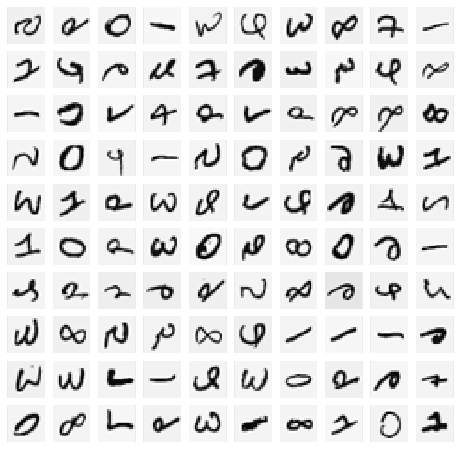

In [8]:
X,y = load_mat('ex4data1.mat')
plot_100_images(X)


In [9]:

X.shape, y.shape

((5000, 400), (5000,))

In [0]:
from sklearn.preprocessing import OneHotEncoder
def expand_y(y):
    result = []
    # 把y中每个类别转化为一个向量，对应的lable值在向量对应位置上置为1
    for i in y:
        y_array = np.zeros(10)
        y_array[i-1] = 1
        result.append(y_array)
    '''
    # 或者用sklearn中OneHotEncoder函数
    encoder =  OneHotEncoder(sparse=False)  # return a array instead of matrix
    y_onehot = encoder.fit_transform(y.reshape(-1,1))
    return y_onehot
    ''' 
    return np.array(result)


In [11]:
raw_X, raw_y = load_mat('ex4data1.mat')
X = np.insert(raw_X, 0, 1, axis=1)
print(raw_y.shape)
y = expand_y(raw_y)
X.shape, y.shape
'''
((5000, 401), (5000, 10))
'''


(5000,)


'\n((5000, 401), (5000, 10))\n'

In [0]:
def load_weight(path):
    data = loadmat(path)
    return data['Theta1'], data['Theta2'] 


In [13]:
t1, t2 = load_weight('ex4weights.mat')
t1.shape, t2.shape
# ((25, 401), (10, 26))


((25, 401), (10, 26))

In [0]:
def serialize(a, b):
    '''展开参数'''
    return np.r_[a.flatten(),b.flatten()]


In [15]:
theta = serialize(t1, t2)  # 扁平化参数，25*401+10*26=10285
theta.shape  # (10285,)


(10285,)

In [0]:
def deserialize(seq):
    '''提取参数'''
    return seq[:25*401].reshape(25, 401), seq[25*401:].reshape(10, 26)


In [0]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [0]:
def feed_forward(theta, X,):
    '''得到每层的输入和输出'''
    t1, t2 = deserialize(theta)
    # 前面已经插入过偏置单元，这里就不用插入了
    a1 = X
    z2 = a1 @ t1.T
    a2 = np.insert(sigmoid(z2), 0, 1, axis=1)
    z3 = a2 @ t2.T
    a3 = sigmoid(z3)
    
    return a1, z2, a2, z3, a3 


In [0]:
a1, z2, a2, z3, h = feed_forward(theta, X)


In [20]:
def cost(theta, X, y):
    a1, z2, a2, z3, h = feed_forward(theta, X)
    J = 0
    for i in range(len(X)):
        first = - y[i] * np.log(h[i])
        second = (1 - y[i]) * np.log(1 - h[i])
        J = J + np.sum(first - second)
    J = J / len(X)
    return J
'''
     # or just use verctorization
     J = - y * np.log(h) - (1 - y) * np.log(1 - h)
     return J.sum() / len(X)
'''


'\n     # or just use verctorization\n     J = - y * np.log(h) - (1 - y) * np.log(1 - h)\n     return J.sum() / len(X)\n'

In [21]:
cost(theta, X, y)  # 0.2876291651613189

0.2876291651613188

In [0]:
def regularized_cost(theta, X, y, l=1):
    '''正则化时忽略每层的偏置项，也就是参数矩阵的第一列'''
    t1, t2 = deserialize(theta)
    reg = np.sum(t1[:,1:] ** 2) + np.sum(t2[:,1:] ** 2)  # or use np.power(a, 2)
    return l / (2 * len(X)) * reg + cost(theta, X, y)


In [23]:
regularized_cost(theta, X, y, 1)  # 0.38376985909092354


0.38376985909092354

In [0]:
def sigmoid_gradient(z):
    return sigmoid(z) * (1 - sigmoid(z))


In [0]:
def random_init(size):
    '''从服从的均匀分布的范围中随机返回size大小的值'''
    return np.random.uniform(-0.12, 0.12, size)


In [26]:
print('a1', a1.shape,'t1', t1.shape)
print('z2', z2.shape)
print('a2', a2.shape, 't2', t2.shape)
print('z3', z3.shape)
print('a3', h.shape)
'''
a1 (5000, 401) t1 (25, 401)
z2 (5000, 25)
a2 (5000, 26) t2 (10, 26)
z3 (5000, 10)
a3 (5000, 10)
'''


a1 (5000, 401) t1 (25, 401)
z2 (5000, 25)
a2 (5000, 26) t2 (10, 26)
z3 (5000, 10)
a3 (5000, 10)


'\na1 (5000, 401) t1 (25, 401)\nz2 (5000, 25)\na2 (5000, 26) t2 (10, 26)\nz3 (5000, 10)\na3 (5000, 10)\n'

In [0]:
def gradient(theta, X, y):
    '''
    unregularized gradient, notice no d1 since the input layer has no error 
    return 所有参数theta的梯度，故梯度D(i)和参数theta(i)同shape，重要。
    '''
    t1, t2 = deserialize(theta)
    a1, z2, a2, z3, h = feed_forward(theta, X)
    d3 = h - y # (5000, 10)
    d2 = d3 @ t2[:,1:] * sigmoid_gradient(z2)  # (5000, 25)
    D2 = d3.T @ a2  # (10, 26)
    D1 = d2.T @ a1 # (25, 401)
    D = (1 / len(X)) * serialize(D1, D2)  # (10285,)
    
    return D


In [0]:
def gradient_checking(theta, X, y, e):
    def a_numeric_grad(plus, minus):
        """
        对每个参数theta_i计算数值梯度，即理论梯度。
        """
        return (regularized_cost(plus, X, y) - regularized_cost(minus, X, y)) / (e * 2)
   
    numeric_grad = [] 
    for i in range(len(theta)):
        plus = theta.copy()  # deep copy otherwise you will change the raw theta
        minus = theta.copy()
        plus[i] = plus[i] + e
        minus[i] = minus[i] - e
        grad_i = a_numeric_grad(plus, minus)
        numeric_grad.append(grad_i)
    
    numeric_grad = np.array(numeric_grad)
    analytic_grad = regularized_gradient(theta, X, y)
    diff = np.linalg.norm(numeric_grad - analytic_grad) / np.linalg.norm(numeric_grad + analytic_grad)

    print('If your backpropagation implementation is correct,\nthe relative difference will be smaller than 10e-9 (assume epsilon=0.0001).\nRelative Difference: {}\n'.format(diff))



In [0]:
gradient_checking(theta, X, y, e= 0.0001)#这个运行很慢，谨慎运行


In [0]:
def regularized_gradient(theta, X, y, l=1):
    """不惩罚偏置单元的参数"""
    a1, z2, a2, z3, h = feed_forward(theta, X)
    D1, D2 = deserialize(gradient(theta, X, y))
    t1[:,0] = 0
    t2[:,0] = 0
    reg_D1 = D1 + (l / len(X)) * t1
    reg_D2 = D2 + (l / len(X)) * t2
    
    return serialize(reg_D1, reg_D2)


In [0]:
def nn_training(X, y):
    init_theta = random_init(10285)  # 25*401 + 10*26

    res = opt.minimize(fun=regularized_cost,
                       x0=init_theta,
                       args=(X, y, 1),
                       method='TNC',
                       jac=regularized_gradient,
                       options={'maxiter': 400})
    return res


In [32]:
res = nn_training(X, y)#慢
res
'''
     fun: 0.5156784004838036
     jac: array([-2.51032294e-04, -2.11248326e-12,  4.38829369e-13, ...,
        9.88299811e-05, -2.59923586e-03, -8.52351187e-04])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 271
     nit: 17
  status: 1
 success: True
       x: array([ 0.58440213, -0.02013683,  0.1118854 , ..., -2.8959637 ,
        1.85893941, -2.78756836])
'''


"\n     fun: 0.5156784004838036\n     jac: array([-2.51032294e-04, -2.11248326e-12,  4.38829369e-13, ...,\n        9.88299811e-05, -2.59923586e-03, -8.52351187e-04])\n message: 'Converged (|f_n-f_(n-1)| ~= 0)'\n    nfev: 271\n     nit: 17\n  status: 1\n success: True\n       x: array([ 0.58440213, -0.02013683,  0.1118854 , ..., -2.8959637 ,\n        1.85893941, -2.78756836])\n"

In [0]:
def accuracy(theta, X, y):
    _, _, _, _, h = feed_forward(res.x, X)
    y_pred = np.argmax(h, axis=1) + 1
    print(classification_report(y, y_pred))


In [34]:
accuracy(res.x, X, raw_y)
'''
             precision    recall  f1-score   support

          1       0.97      0.99      0.98       500
          2       0.98      0.97      0.98       500
          3       0.98      0.95      0.96       500
          4       0.98      0.97      0.97       500
          5       0.97      0.98      0.97       500
          6       0.99      0.98      0.98       500
          7       0.99      0.97      0.98       500
          8       0.96      0.98      0.97       500
          9       0.97      0.98      0.97       500
         10       0.99      0.99      0.99       500

avg / total       0.98      0.98      0.98      5000
'''


             precision    recall  f1-score   support

          1       0.98      0.97      0.97       500
          2       0.94      0.92      0.93       500
          3       0.94      0.92      0.93       500
          4       0.94      0.95      0.95       500
          5       0.94      0.93      0.94       500
          6       0.95      0.97      0.96       500
          7       0.96      0.95      0.95       500
          8       0.93      0.94      0.93       500
          9       0.92      0.92      0.92       500
         10       0.96      0.97      0.97       500

avg / total       0.95      0.95      0.95      5000



'\n             precision    recall  f1-score   support\n\n          1       0.97      0.99      0.98       500\n          2       0.98      0.97      0.98       500\n          3       0.98      0.95      0.96       500\n          4       0.98      0.97      0.97       500\n          5       0.97      0.98      0.97       500\n          6       0.99      0.98      0.98       500\n          7       0.99      0.97      0.98       500\n          8       0.96      0.98      0.97       500\n          9       0.97      0.98      0.97       500\n         10       0.99      0.99      0.99       500\n\navg / total       0.98      0.98      0.98      5000\n'

In [0]:
def plot_hidden(theta):
    t1, _ = deserialize(theta)
    t1 = t1[:, 1:]
    fig,ax_array = plt.subplots(5, 5, sharex=True, sharey=True, figsize=(6,6))
    for r in range(5):
        for c in range(5):
            ax_array[r, c].matshow(t1[r * 5 + c].reshape(20, 20), cmap='gray_r')
            plt.xticks([])
            plt.yticks([])
    plt.show()


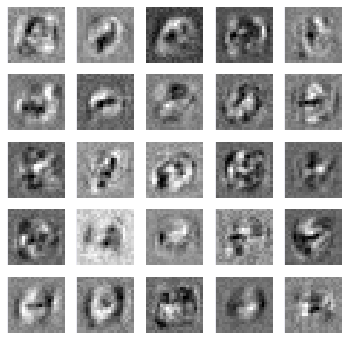

In [37]:
plot_hidden(res.x)
